<a href="https://colab.research.google.com/github/insomnia98/2021-LTspice-practice/blob/main/0_15_0_1_eff_WF_BayesOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=0d62f0e1b8aa40eb34e7eed5e5f3e542c6f11b91edf0f9fcc82c28b2dd8a8e15
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


### 설치 모듈

In [ ]:
import xgboost as xgb

from bayes_opt import BayesianOptimization
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot, skew
from IPython.display import display

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### RGB 가중평균

In [ ]:
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    t_mean = (r*5.0+g*4.7+b*4.4)/(r+g+b)
    return t_mean

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/20220707_seminar/test.csv',index_col='col')

In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
col,,,,,,,,,,,,,,,,,,,,,
0th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398th,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 이미지 업로드

In [ ]:
img=[x for x in range(len(df.columns))]
img_t=[x for x in range(len(df.columns))]

img[0] = Image.open('/content/drive/MyDrive/20220707_seminar/1_10_0.png')
img[1] = Image.open('/content/drive/MyDrive/20220707_seminar/1_10_1.png')
img[2] = Image.open('/content/drive/MyDrive/20220707_seminar/1_10_2.png')
img[3] = Image.open('/content/drive/MyDrive/20220707_seminar/1_10_3.png')
img[4] = Image.open('/content/drive/MyDrive/20220707_seminar/1_10_4.png')
img[5] = Image.open('/content/drive/MyDrive/20220707_seminar/1_10_5.png')
img[6] = Image.open('/content/drive/MyDrive/20220707_seminar/1_10_6.png')
img[7] = Image.open('/content/drive/MyDrive/20220707_seminar/1_10_7.png')
img[8] = Image.open('/content/drive/MyDrive/20220707_seminar/1_10_8.png')
img[9] = Image.open('/content/drive/MyDrive/20220707_seminar/1_10_9.png')

img[10] = Image.open('/content/drive/MyDrive/20220707_seminar/11_20_0.png')
img[11] = Image.open('/content/drive/MyDrive/20220707_seminar/11_20_1.png')
img[12] = Image.open('/content/drive/MyDrive/20220707_seminar/11_20_2.png')
img[13] = Image.open('/content/drive/MyDrive/20220707_seminar/11_20_3.png')
img[14] = Image.open('/content/drive/MyDrive/20220707_seminar/11_20_4.png')
img[15] = Image.open('/content/drive/MyDrive/20220707_seminar/11_20_5.png')
img[16] = Image.open('/content/drive/MyDrive/20220707_seminar/11_20_6.png')
img[17] = Image.open('/content/drive/MyDrive/20220707_seminar/11_20_7.png')
img[18] = Image.open('/content/drive/MyDrive/20220707_seminar/11_20_8.png')
img[19] = Image.open('/content/drive/MyDrive/20220707_seminar/11_20_9.png')

img[20] = Image.open('/content/drive/MyDrive/20220707_seminar/21_30_0.png')
img[21] = Image.open('/content/drive/MyDrive/20220707_seminar/21_30_1.png')
img[22] = Image.open('/content/drive/MyDrive/20220707_seminar/21_30_2.png')
img[23] = Image.open('/content/drive/MyDrive/20220707_seminar/21_30_3.png')
img[24] = Image.open('/content/drive/MyDrive/20220707_seminar/21_30_4.png')
img[25] = Image.open('/content/drive/MyDrive/20220707_seminar/21_30_5.png')
img[26] = Image.open('/content/drive/MyDrive/20220707_seminar/21_30_6.png')
img[27] = Image.open('/content/drive/MyDrive/20220707_seminar/21_30_7.png')
img[28] = Image.open('/content/drive/MyDrive/20220707_seminar/21_30_8.png')
img[29] = Image.open('/content/drive/MyDrive/20220707_seminar/21_30_9.png')

img[30] = Image.open('/content/drive/MyDrive/20220707_seminar/31_40_0.png')
img[31] = Image.open('/content/drive/MyDrive/20220707_seminar/31_40_1.png')
img[32] = Image.open('/content/drive/MyDrive/20220707_seminar/31_40_2.png')
img[33] = Image.open('/content/drive/MyDrive/20220707_seminar/31_40_3.png')
img[34] = Image.open('/content/drive/MyDrive/20220707_seminar/31_40_4.png')
img[35] = Image.open('/content/drive/MyDrive/20220707_seminar/31_40_5.png')
img[36] = Image.open('/content/drive/MyDrive/20220707_seminar/31_40_6.png')
img[37] = Image.open('/content/drive/MyDrive/20220707_seminar/31_40_7.png')
img[38] = Image.open('/content/drive/MyDrive/20220707_seminar/31_40_8.png')
img[39] = Image.open('/content/drive/MyDrive/20220707_seminar/31_40_9.png')

img[40] = Image.open('/content/drive/MyDrive/20220707_seminar/41_50_0.png')
img[41] = Image.open('/content/drive/MyDrive/20220707_seminar/41_50_1.png')
img[42] = Image.open('/content/drive/MyDrive/20220707_seminar/41_50_2.png')
img[43] = Image.open('/content/drive/MyDrive/20220707_seminar/41_50_3.png')
img[44] = Image.open('/content/drive/MyDrive/20220707_seminar/41_50_4.png')
img[45] = Image.open('/content/drive/MyDrive/20220707_seminar/41_50_5.png')
img[46] = Image.open('/content/drive/MyDrive/20220707_seminar/41_50_6.png')
img[47] = Image.open('/content/drive/MyDrive/20220707_seminar/41_50_7.png')
img[48] = Image.open('/content/drive/MyDrive/20220707_seminar/41_50_8.png')
img[49] = Image.open('/content/drive/MyDrive/20220707_seminar/41_50_9.png')

img[50] = Image.open('/content/drive/MyDrive/20220707_seminar/51_60_0.png')
img[51] = Image.open('/content/drive/MyDrive/20220707_seminar/51_60_1.png')
img[52] = Image.open('/content/drive/MyDrive/20220707_seminar/51_60_2.png')
img[53] = Image.open('/content/drive/MyDrive/20220707_seminar/51_60_3.png')
img[54] = Image.open('/content/drive/MyDrive/20220707_seminar/51_60_4.png')
img[55] = Image.open('/content/drive/MyDrive/20220707_seminar/51_60_5.png')
img[56] = Image.open('/content/drive/MyDrive/20220707_seminar/51_60_6.png')
img[57] = Image.open('/content/drive/MyDrive/20220707_seminar/51_60_7.png')
img[58] = Image.open('/content/drive/MyDrive/20220707_seminar/51_60_8.png')
img[59] = Image.open('/content/drive/MyDrive/20220707_seminar/51_60_9.png')

img[60] = Image.open('/content/drive/MyDrive/20220707_seminar/61_70_0.png')
img[61] = Image.open('/content/drive/MyDrive/20220707_seminar/61_70_1.png')
img[62] = Image.open('/content/drive/MyDrive/20220707_seminar/61_70_2.png')
img[63] = Image.open('/content/drive/MyDrive/20220707_seminar/61_70_3.png')
img[64] = Image.open('/content/drive/MyDrive/20220707_seminar/61_70_4.png')
img[65] = Image.open('/content/drive/MyDrive/20220707_seminar/61_70_5.png')
img[66] = Image.open('/content/drive/MyDrive/20220707_seminar/61_70_6.png')
img[67] = Image.open('/content/drive/MyDrive/20220707_seminar/61_70_7.png')
img[68] = Image.open('/content/drive/MyDrive/20220707_seminar/61_70_8.png')
img[69] = Image.open('/content/drive/MyDrive/20220707_seminar/61_70_9.png')

img[70] = Image.open('/content/drive/MyDrive/20220707_seminar/71_80_0.png')
img[71] = Image.open('/content/drive/MyDrive/20220707_seminar/71_80_1.png')
img[72] = Image.open('/content/drive/MyDrive/20220707_seminar/71_80_2.png')
img[73] = Image.open('/content/drive/MyDrive/20220707_seminar/71_80_3.png')
img[74] = Image.open('/content/drive/MyDrive/20220707_seminar/71_80_4.png')
img[75] = Image.open('/content/drive/MyDrive/20220707_seminar/71_80_5.png')
img[76] = Image.open('/content/drive/MyDrive/20220707_seminar/71_80_6.png')
img[77] = Image.open('/content/drive/MyDrive/20220707_seminar/71_80_7.png')
img[78] = Image.open('/content/drive/MyDrive/20220707_seminar/71_80_8.png')
img[79] = Image.open('/content/drive/MyDrive/20220707_seminar/71_80_9.png')

img[80] = Image.open('/content/drive/MyDrive/20220707_seminar/81_90_0.png')
img[81] = Image.open('/content/drive/MyDrive/20220707_seminar/81_90_1.png')
img[82] = Image.open('/content/drive/MyDrive/20220707_seminar/81_90_2.png')
img[83] = Image.open('/content/drive/MyDrive/20220707_seminar/81_90_3.png')
img[84] = Image.open('/content/drive/MyDrive/20220707_seminar/81_90_4.png')
img[85] = Image.open('/content/drive/MyDrive/20220707_seminar/81_90_5.png')
img[86] = Image.open('/content/drive/MyDrive/20220707_seminar/81_90_6.png')
img[87] = Image.open('/content/drive/MyDrive/20220707_seminar/81_90_7.png')
img[88] = Image.open('/content/drive/MyDrive/20220707_seminar/81_90_8.png')
img[89] = Image.open('/content/drive/MyDrive/20220707_seminar/81_90_9.png')

img[90] = Image.open('/content/drive/MyDrive/20220707_seminar/91_100_0.png')
img[91] = Image.open('/content/drive/MyDrive/20220707_seminar/91_100_1.png')
img[92] = Image.open('/content/drive/MyDrive/20220707_seminar/91_100_2.png')
img[93] = Image.open('/content/drive/MyDrive/20220707_seminar/91_100_3.png')
img[94] = Image.open('/content/drive/MyDrive/20220707_seminar/91_100_4.png')
img[95] = Image.open('/content/drive/MyDrive/20220707_seminar/91_100_5.png')
img[96] = Image.open('/content/drive/MyDrive/20220707_seminar/91_100_6.png')
img[97] = Image.open('/content/drive/MyDrive/20220707_seminar/91_100_7.png')
img[98] = Image.open('/content/drive/MyDrive/20220707_seminar/91_100_8.png')
img[99] = Image.open('/content/drive/MyDrive/20220707_seminar/91_100_9.png')

### 이미지 처리

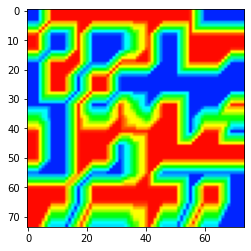

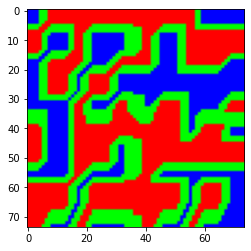

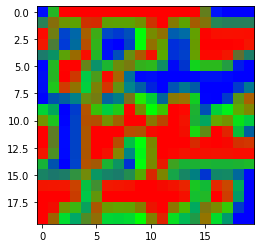

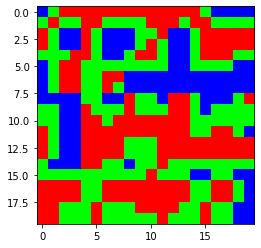

In [ ]:
a,b=37,37


for i in range(len(img)):
    img[i]=img[i].crop(((137/2)-a,98-b,(137/2)+a,98+b))
    if i==0 :
        plt.imshow(img[i])
        plt.show()
    for j in range(0,img[i].size[0]):
        for k in range(0,img[i].size[1]):
            rgb = list(img[i].getpixel((j,k)))
            rgb_max = max(rgb)
            rgb_max_index = rgb.index(rgb_max)
            rgb[0],rgb[1],rgb[2]=0,0,0
            rgb[rgb_max_index]=255
            img[i].putpixel((j,k),(rgb[0],rgb[1],rgb[2]))
    if i==0 :
        plt.imshow(img[i])
        plt.show()
    img[i]=img[i].resize((20,20))
    
    if i==0 :
        plt.imshow(img[i])
        plt.show()

    for j in range(0,img[i].size[0]):
        for k in range(0,img[i].size[1]):
            rgb = list(img[i].getpixel((j,k)))
            
            rgb_max = max(rgb)
            rgb_max_index = rgb.index(rgb_max)
            rgb[0],rgb[1],rgb[2]=0,0,0
            rgb[rgb_max_index]=255
            img[i].putpixel((j,k),(rgb[0],rgb[1],rgb[2]))
            
    if i==0 :
        plt.imshow(img[i])
        plt.show()
'''

    
    img[i]=img[i].resize((20,20))
'''    

'''
    img_t[i]=img[i]
    if i==0 :
        plt.imshow(img_t[i])
        plt.show()
    for j in range(0,img[i].size[0]):
        for k in range(0,img[i].size[1]):
            rgb = list(img[i].getpixel((j,k)))
            img_t[i].putpixel((j,k),(rgb[0],rgb[1],rgb[2]))
    if i==0:
        plt.imshow(img_t[i])
        plt.show()
'''
lstt=[[[0 for col in range(20)] for row in range(20)] for depth in range(100)]

for i in range(len(img)):
    for j in range(0,img[i].size[0]):
        for k in range(0,img[i].size[1]):
            rgb = list(img[i].getpixel((k,j)))
            #rgb_max = max(rgb)
            #rgb_max_index = rgb.index(rgb_max)
            #rgb_max_index = 5.0-(rgb_max_index*0.3)
            lstt[i][j][k]=rgb_to_hex(rgb[0],rgb[1],rgb[2])
            #df.loc[(str(j*20+k)+'th'),str(i+1)]=rgb_to_hex(rgb[0],rgb[1],rgb[2])


In [ ]:
#df.loc[(str(j*20+k)+'th'),str(i+1)]=rgb_to_hex(rgb[0],rgb[1],rgb[2])



d=[0.0 for x in range(9)]
for i in range(100):
    for j in range(20):
        for k in range(20) :
            if j==0 and k==0 :
                d[0]=lstt[i][j][k]
                d[1]=lstt[i][j][k]
                d[2]=lstt[i][j][k]
                d[3]=lstt[i][j][k]
                d[6]=lstt[i][j][k]
                d[4]=lstt[i][j][k]
                
               
                d[5]=lstt[i][j][k+1]
                
                d[7]=lstt[i][j+1][k]
                d[8]=lstt[i][j+1][k+1]   
            elif j==0 and k!=0 and k!=19:
                d[0],d[1],d[2],d[4]=lstt[i][j][k],lstt[i][j][k],lstt[i][j][k],lstt[i][j][k]
                
                d[3]=lstt[i][j][k-1]
                
                d[5]=lstt[i][j][k+1]
                d[6]=lstt[i][j+1][k-1]
                d[7]=lstt[i][j+1][k]
                d[8]=lstt[i][j+1][k+1]   
            elif j==0 and k==19 :
                d[0],d[1],d[2],d[5],d[8],d[4]=lstt[i][j][k],lstt[i][j][k],lstt[i][j][k],lstt[i][j][k],lstt[i][j][k],lstt[i][j][k]
                
                d[3]=lstt[i][j][k-1]
                
                d[6]=lstt[i][j+1][k-1]
                d[7]=lstt[i][j+1][k]
                  
            elif j!=0 and j!=19 and k==0 :
                d[0],d[3],d[6],d[4]=lstt[i][j][k],lstt[i][j][k],lstt[i][j][k],lstt[i][j][k]
                
                d[1]=lstt[i][j-1][k]
                d[2]=lstt[i][j-1][k+1]
                
                d[5]=lstt[i][j][k+1]
                d[7]=lstt[i][j+1][k]
                d[8]=lstt[i][j+1][k+1]   
            elif j!=0 and j!=19 and k==19 :
                d[2],d[5],d[8],d[4]=lstt[i][j][k],lstt[i][j][k],lstt[i][j][k],lstt[i][j][k]
                d[0]=lstt[i][j-1][k-1]
                d[1]=lstt[i][j-1][k]
                d[3]=lstt[i][j][k-1]
                d[6]=lstt[i][j+1][k-1]
                d[7]=lstt[i][j+1][k]
            elif j==19 and k==0:
                d[0],d[3],d[6],d[7],d[8],d[4]=lstt[i][j][k],lstt[i][j][k],lstt[i][j][k],lstt[i][j][k],lstt[i][j][k],lstt[i][j][k]
                d[1]=lstt[i][j-1][k]
                d[2]=lstt[i][j-1][k+1]
                d[5]=lstt[i][j][k+1]
                 
            elif j==19 and k!=0 and k!=19 :
                d[6],d[7],d[8],d[4]=lstt[i][j][k],lstt[i][j][k],lstt[i][j][k],lstt[i][j][k]
                d[0]=lstt[i][j-1][k-1]
                d[1]=lstt[i][j-1][k]
                d[2]=lstt[i][j-1][k+1]
                d[3]=lstt[i][j][k-1]
               
                d[5]=lstt[i][j][k+1]
                
            elif j==19 and k==19 :
                d[2],d[5],d[6],d[7],d[8],d[4]=lstt[i][j][k],lstt[i][j][k],lstt[i][j][k],lstt[i][j][k],lstt[i][j][k],lstt[i][j][k]
                d[0]=lstt[i][j-1][k-1]
                d[1]=lstt[i][j-1][k]
                
                d[3]=lstt[i][j][k-1]
                
                  
            else :
                d[0]=lstt[i][j-1][k-1]
                d[1]=lstt[i][j-1][k]
                d[2]=lstt[i][j-1][k+1]
                d[3]=lstt[i][j][k-1]
                d[4]=lstt[i][j][k]
                d[5]=lstt[i][j][k+1]
                d[6]=lstt[i][j+1][k-1]
                d[7]=lstt[i][j+1][k]
                d[8]=lstt[i][j+1][k+1]   
            # coef1 : 거리1  coef : 거리 루트2
            coef1=0.15
            coef2=0.1
            A=coef1*(d[1]+d[3]+d[5]+d[7]-d[4]-d[4]-d[4]-d[4])
            B=coef2*(d[0]+d[2]+d[6]+d[8]-d[4]-d[4]-d[4]-d[4])
            eff=d[4]+A+B
            df.loc[(str(j*20+k)+'th'),str(i+1)]=eff
            d=[0.0 for x in range(9)]

### Off current

In [ ]:
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/20220707_seminar/1_100_Id_Vg.xlsx')

In [ ]:
i_off = data.loc[[110],:]

In [ ]:
i_off
lst1=i_off.values.tolist()
lst1=sum(lst1,[])

In [ ]:
lst1.pop(0)

0.0

In [ ]:
len(lst1)

100

In [ ]:
for i in range(len(lst1)) :
    df.loc['400th',str(i+1)]=lst1[i]*1E+17

train=df.transpose()
train.head()
test = train.copy()

In [ ]:
train

col,0th,1th,2th,3th,4th,5th,6th,7th,8th,9th,...,391th,392th,393th,394th,395th,396th,397th,398th,399th,400th
1,4.55,4.745,4.880,4.925,4.970,4.970,4.925,4.895,4.895,4.925,...,4.910,4.820,4.730,4.775,4.850,4.775,4.625,4.475,4.400,1.939488
2,4.40,4.430,4.475,4.580,4.700,4.655,4.550,4.700,4.850,4.775,...,4.700,4.700,4.730,4.820,4.880,4.775,4.775,4.925,5.000,2.159059
3,5.00,5.000,5.000,5.000,4.925,4.700,4.475,4.550,4.850,5.000,...,4.955,4.820,4.655,4.550,4.625,4.700,4.700,4.745,4.880,1.588411
4,4.55,4.775,4.955,5.000,4.925,4.730,4.625,4.775,4.880,4.775,...,4.700,4.925,4.925,4.745,4.655,4.670,4.625,4.475,4.400,1.827935
5,5.00,5.000,5.000,5.000,5.000,4.970,4.925,4.820,4.700,4.670,...,5.000,5.000,5.000,5.000,5.000,5.000,4.970,4.925,4.925,1.663585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,4.88,4.700,4.550,4.505,4.550,4.730,4.925,4.925,4.775,4.745,...,4.805,4.925,4.955,4.820,4.730,4.700,4.700,4.655,4.520,1.658316
97,4.52,4.700,4.850,4.925,4.970,4.970,4.925,4.805,4.640,4.730,...,5.000,5.000,5.000,4.970,4.880,4.790,4.880,4.970,5.000,1.790232
98,5.00,5.000,5.000,5.000,4.925,4.730,4.550,4.595,4.760,4.715,...,4.670,4.475,4.475,4.625,4.700,4.700,4.625,4.475,4.400,1.683417
99,4.85,4.625,4.475,4.595,4.880,5.000,5.000,4.970,4.880,4.715,...,5.000,5.000,5.000,5.000,4.925,4.775,4.700,4.655,4.520,1.648445


In [ ]:
train=train[0:80]
test=test[80:100]

In [ ]:
test

col,0th,1th,2th,3th,4th,5th,6th,7th,8th,9th,...,391th,392th,393th,394th,395th,396th,397th,398th,399th,400th
81,4.880,4.700,4.550,4.505,4.505,4.505,4.505,4.475,4.430,4.400,...,5.000,5.000,4.955,4.820,4.805,4.925,4.925,4.700,4.475,1.679170
82,4.475,4.475,4.505,4.700,4.925,5.000,5.000,5.000,5.000,5.000,...,4.880,4.970,4.970,4.955,4.895,4.775,4.700,4.655,4.520,1.891128
83,4.550,4.745,4.880,4.925,4.970,5.000,5.000,4.925,4.775,4.730,...,4.955,4.820,4.655,4.550,4.700,4.925,4.970,4.925,4.925,2.484280
84,4.925,4.730,4.550,4.580,4.700,4.685,4.625,4.775,4.955,5.000,...,4.700,4.700,4.745,4.880,4.895,4.775,4.775,4.925,5.000,1.607629
85,4.550,4.745,4.880,4.925,4.970,4.970,4.925,4.805,4.595,4.475,...,4.775,4.925,5.000,4.970,4.880,4.745,4.700,4.625,4.475,1.794121
86,4.550,4.745,4.880,4.925,4.895,4.730,4.550,4.475,4.430,4.400,...,4.400,4.400,4.475,4.700,4.925,5.000,4.955,4.775,4.550,1.727318
87,4.955,4.970,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,...,4.700,4.700,4.700,4.625,4.475,4.400,4.475,4.670,4.880,1.861807
88,4.925,4.730,4.550,4.505,4.550,4.730,4.925,4.850,4.550,4.400,...,4.775,4.925,5.000,4.970,4.880,4.790,4.880,4.970,5.000,1.832879
89,4.475,4.670,4.850,4.850,4.775,4.820,4.955,4.850,4.550,4.400,...,5.000,5.000,4.955,4.820,4.730,4.700,4.625,4.475,4.400,1.728057
90,4.400,4.430,4.475,4.505,4.550,4.730,4.895,4.805,4.520,4.400,...,4.775,4.700,4.700,4.745,4.880,4.970,4.955,4.775,4.550,2.174098


In [ ]:
train

col,0th,1th,2th,3th,4th,5th,6th,7th,8th,9th,...,391th,392th,393th,394th,395th,396th,397th,398th,399th,400th
1,4.550,4.745,4.880,4.925,4.970,4.970,4.925,4.895,4.895,4.925,...,4.910,4.820,4.730,4.775,4.850,4.775,4.625,4.475,4.400,1.939488
2,4.400,4.430,4.475,4.580,4.700,4.655,4.550,4.700,4.850,4.775,...,4.700,4.700,4.730,4.820,4.880,4.775,4.775,4.925,5.000,2.159059
3,5.000,5.000,5.000,5.000,4.925,4.700,4.475,4.550,4.850,5.000,...,4.955,4.820,4.655,4.550,4.625,4.700,4.700,4.745,4.880,1.588411
4,4.550,4.775,4.955,5.000,4.925,4.730,4.625,4.775,4.880,4.775,...,4.700,4.925,4.925,4.745,4.655,4.670,4.625,4.475,4.400,1.827935
5,5.000,5.000,5.000,5.000,5.000,4.970,4.925,4.820,4.700,4.670,...,5.000,5.000,5.000,5.000,5.000,5.000,4.970,4.925,4.925,1.663585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,5.000,5.000,5.000,5.000,4.925,4.730,4.550,4.580,4.775,4.955,...,4.850,4.550,4.400,4.400,4.400,4.400,4.400,4.400,4.400,1.817882
77,4.925,4.700,4.475,4.475,4.625,4.655,4.550,4.625,4.880,5.000,...,4.550,4.430,4.445,4.580,4.670,4.700,4.700,4.745,4.880,2.972650
78,4.880,4.700,4.550,4.625,4.805,4.730,4.550,4.505,4.550,4.685,...,4.520,4.430,4.475,4.700,4.925,5.000,5.000,5.000,5.000,1.747619
79,5.000,5.000,5.000,4.925,4.775,4.775,4.925,5.000,5.000,5.000,...,4.700,4.700,4.745,4.880,4.895,4.775,4.625,4.475,4.400,1.695322


### Train Data와 Test Data 분리

In [ ]:
x=train[[str(x)+'th' for x in range(400) ]]
y=train['400th']
x_train=x
y_train=y

x1=test[[str(x)+'th' for x in range(400) ]]
y1=test['400th']
x_test=x1
y_test=y1

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0)
#y_test

In [ ]:
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 탐색 대상 함수 (XGBRegressor)
def XGB_cv(max_depth,learning_rate, n_estimators
             ,colsample_bytree, silent=True, nthread=-1):

    # 모델 정의
    model = xgb.XGBRegressor(objective='reg:squarederror',max_depth=int(max_depth),
                                learning_rate=learning_rate,
                                n_estimators=int(n_estimators),
                                colsample_bytree=colsample_bytree, 
                                nthread=nthread
                                )
    # 모델 훈련
    model.fit(x_train, y_train)

    # 예측값 출력
    y_pred= model.predict(x_test)

    # 각종 metric 계산
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    # 오차 최적화로 사용할 metric 반환
    return 100-mape

In [ ]:
pbounds = {'max_depth': (3,20),
                'learning_rate': (0.001,0.3),
                'n_estimators': (1000, 2000),
                'colsample_bytree' :(0.05, 0.2)
                }

# Bayesian optimization 객체 생성
# f : 탐색 대상 함수, pbounds : hyperparameter 집합
# verbose = 2 항상 출력, verbose = 1 최댓값일 때 출력, verbose = 0 출력 안함
# random_state : Bayesian Optimization 상의 랜덤성이 존재하는 부분을 통제 
bo=BayesianOptimization(f=XGB_cv, pbounds=pbounds, verbose=2, random_state=1 )    

# 메소드를 이용해 최대화 과정 수행
# init_points :  초기 Random Search 갯수
# n_iter : 반복 횟수 (몇개의 입력값-함숫값 점들을 확인할지! 많을 수록 정확한 값을 얻을 수 있다.)
# acq : Acquisition Function들 중 Expected Improvement(EI) 를 사용
# xi : exploration 강도 (기본값은 0.0)
#bo.maximize(init_points=2, n_iter=30, acq='ei', xi=0.01)
bo.maximize(init_points=20, n_iter=40, acq='ei', xi=0.01)
# ‘iter’는 반복 회차, ‘target’은 목적 함수의 값, 나머지는 입력값을 나타냅니다. 
# 현재 회차 이전까지 조사된 함숫값들과 비교하여, 현재 회차에 최댓값이 얻어진 경우, 
# bayesian-optimization 라이브러리는 이를 자동으로 다른 색 글자로 표시하는 것을 확인할 수 있습니다

# 찾은 파라미터 값 확인
print(bo.max)

|   iter    |  target   | colsam... | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        |  95.15    |  0.1126   |  0.2164   |  3.002    |  1.302e+0 |
|  2        |  94.93    |  0.07201  |  0.02861  |  6.166    |  1.346e+0 |
|  3        |  93.72    |  0.1095   |  0.1621   |  10.13    |  1.685e+0 |
|  4        |  93.28    |  0.08067  |  0.2636   |  3.466    |  1.67e+03 |
|  5        |  95.02    |  0.1126   |  0.168    |  5.387    |  1.198e+0 |
|  6        |  94.04    |  0.1701   |  0.2905   |  8.328    |  1.692e+0 |
|  7        |  93.54    |  0.1815   |  0.2685   |  4.446    |  1.039e+0 |
|  8        |  91.64    |  0.07547  |  0.2636   |  4.672    |  1.421e+0 |
|  9        |  94.07    |  0.1937   |  0.1604   |  14.76    |  1.316e+0 |
|  10       |  94.24    |  0.153    |  0.2506   |  3.311    |  1.75e+03 |
|  11       |  93.46    |  0.1983   |  0.2247   |  7.768    |  1.789e+0 |
|  12       |  92.96    |  0.06548  | 

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror',max_depth=int((bo.max['params'])['max_depth'])
                                ,learning_rate= (bo.max['params'])['learning_rate']
                                ,n_estimators=int((bo.max['params'])['n_estimators'])
                                ,colsample_bytree=(bo.max['params'])['colsample_bytree']    
                                )

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})
result['ratio(%)'] = abs((result['pred'] - result['real']) / result['real']) * 100
result

,pred,real,ratio(%)
81,1.716428,1.679170,2.218841
82,1.870445,1.891128,1.093689
83,1.925403,2.484280,22.496539
84,1.746719,1.607629,8.651878
85,1.744739,1.794121,2.752449
86,1.741570,1.727318,0.825125
87,1.857789,1.861807,0.215809
88,1.800342,1.832879,1.775148
89,1.715049,1.728057,0.752748
90,1.935810,2.174098,10.960303


In [ ]:
mean_ratio = np.mean(result['ratio(%)'])

print('{:.3f}%'.format(100-mean_ratio))

95.822%


### To PDF

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!jupyter nbconvert --to PDF '/content/drive/My Drive/Colab Notebooks/0707_seminar_BayesOpt.ipynb.ipynb'

[NbConvertApp] WARNING | pattern '/content/drive/My Drive/Colab Notebooks/0707_seminar_BayesOpt.ipynb.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equ